In [6]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical  # Replace np_utils with to_categorical

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one hot encode outputs using to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()

# Convolutional input layer
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

# Second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 100
lrate = 0.01
decay = lrate / epochs

# The 'lr' argument in the SGD optimizer has been updated to 'learning_rate' in the newer versions of TensorFlow/Keras
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)

# Compile the model using categorical crossentropy loss and accuracy as the metric
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Display model summary
print(model.summary())

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,210,090 (16.06 MB)

 Trainable params: 4,210,090 (16.06 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
1563/1563 - 10s - 7ms/step - accuracy: 0.3690 - loss: 1.7318 - val_accuracy: 0.4821 - val_loss: 1.4084
Epoch 2/100
1563/1563 - 6s - 4ms/step - accuracy: 0.5093 - loss: 1.3696 - val_accuracy: 0.5459 - val_loss: 1.2710
Epoch 3/100
1563/1563 - 10s - 6ms/step - accuracy: 0.5795 - loss: 1.1837 - val_accuracy: 0.6143 - val_loss: 1.0851
Epoch 4/100
1563/1563 - 6s - 4ms/step - accuracy: 0.6311 - loss: 1.0442 - val_accuracy: 0.6388 - val_loss: 1.0421
Epoch 5/100
1563/1563 - 11s - 7ms/step - accuracy: 0.6696 - loss: 0.9371 - val_accuracy: 0.6509 - val_loss: 1.0062
Epoch 6/100
1563/1563 - 9s - 6ms/step - accuracy: 0.7022 - loss: 0.8439 - val_accuracy: 0.6614 - val_loss: 0.9812
Epoch 7/100
1563/1563 - 6s - 4ms/step - accuracy: 0.7325 - loss: 0.7626 - val_accuracy: 0.6654 - val_loss: 0.9765
Epoch 8/100
1563/1563 - 5s - 3ms/step - accuracy: 0.7612 - loss: 0.6835 - val_accuracy: 0.6732 - val_loss: 0.9966
Epoch 9/100
1563/1563 - 6s - 4ms/step - accuracy: 0.7847 - loss: 0.6117 - val_ac

In [7]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6862 - loss: 1.3531
Test Accuracy: 68.47%


In [8]:
# Predict first 4 test images
predictions = model.predict(X_test[:4])

# Compare with actual labels
for i in range(4):
    print(f"Image {i+1}: Predicted Label: {predictions[i].argmax()}, Actual Label: {y_test[i].argmax()}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
Image 1: Predicted Label: 3, Actual Label: 3
Image 2: Predicted Label: 8, Actual Label: 8
Image 3: Predicted Label: 8, Actual Label: 8
Image 4: Predicted Label: 0, Actual Label: 0


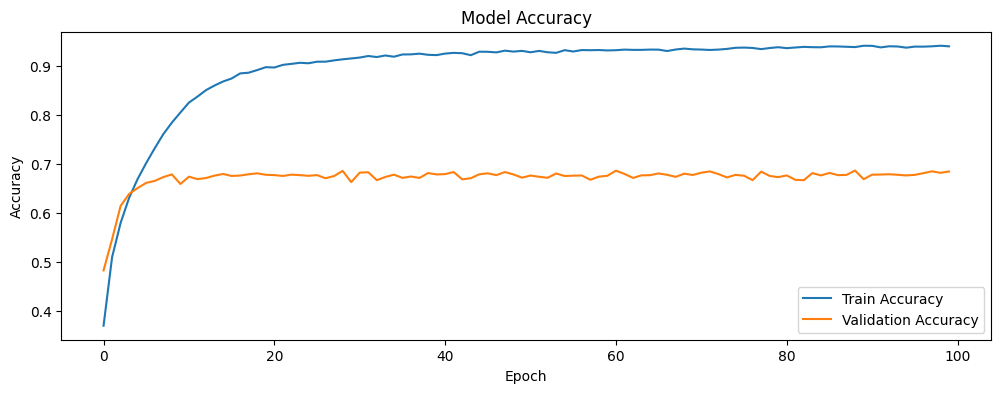

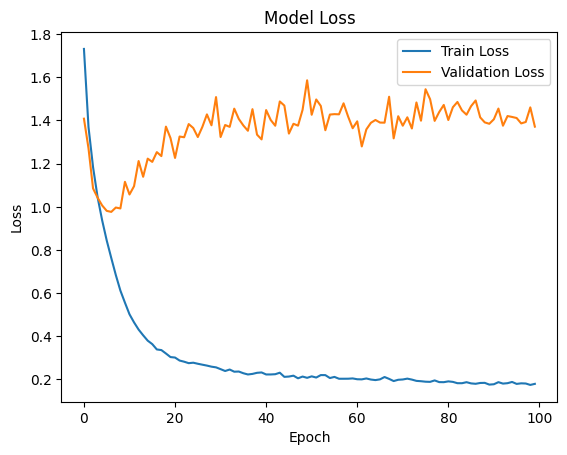

In [10]:
# Visualize accuracy
import matplotlib.pyplot as plt

# Visualize accuracy
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Visualize loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()